In [1]:
%load_ext pyslim_magic

In [5]:
%%slim_stats ll
// set up a simple neutral simulation
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(0);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    // g1 genomic element type: uses m1 or m2 with equal prob for mutations
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 100 kb
    initializeGenomicElement(g1, 0, 0);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);
    target = sample(p1.genomes, 100);
    target.addNewMutation(m1,0, 0);
    log = sim.createLogFile("/dev/stdout", logInterval=1);
    log.addGeneration();
    log.addCustomColumn("H", "calcHeterozygosity(p1.genomes);"); 
}

// run to generation 0
300 late() {
    sim.simulationFinished();
    }


#WARNING (Genome_Class::ExecuteMethod_addNewMutation): addNewMutation should probably not be called from an early() event in a WF model; the added mutation will not influence fitness values during offspring generation.


,generation,H
0,1,0.49995
1,2,0.48000
2,3,0.46620
3,4,0.45795
4,5,0.45195
...,...,...
295,296,0.33180
296,297,0.37500
297,298,0.36480
298,299,0.38955


In [6]:
x = _


<AxesSubplot:xlabel='generation', ylabel='heterozygosity'>

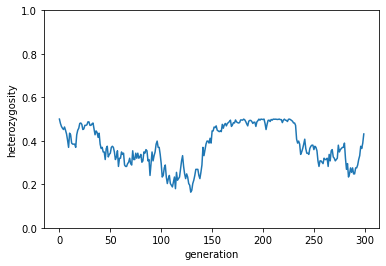

In [7]:
x.H.plot(xlabel="generation", ylabel="heterozygosity", ylim=(0,1))